In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import glob

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [6]:
path = r'Train/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
header_list = ['DEPTH', 'ZONE_LOG', 'CALI', 'GR', 'RT', 'LLS', 'NEUT','SP', 'NET_PAY']
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, names=header_list,sep = ' ', na_values = -999.250000)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471249 entries, 0 to 471248
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DEPTH     471249 non-null  float64
 1   ZONE_LOG  133426 non-null  float64
 2   CALI      116275 non-null  float64
 3   GR        101882 non-null  float64
 4   RT        103750 non-null  float64
 5   LLS       100510 non-null  float64
 6   NEUT      99934 non-null   float64
 7   SP        103423 non-null  float64
 8   NET_PAY   98363 non-null   float64
dtypes: float64(9)
memory usage: 32.4 MB


In [7]:
path = r'Val/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
header_list = ['DEPTH', 'ZONE_LOG', 'CALI', 'GR', 'RT', 'LLS', 'NEUT','SP', 'NET_PAY']
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, names=header_list,sep = ' ', na_values = -999.250000)
    li.append(df)

val = pd.concat(li, axis=0, ignore_index=True)

In [8]:
data_j2b = data[['CALI', 'GR', 'RT', 'LLS', 'NEUT', 'SP', 'NET_PAY']][data['ZONE_LOG'] == 2].dropna().copy()

In [42]:
data_j2b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11846 entries, 18992 to 464756
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CALI     11846 non-null  float64
 1   GR       11846 non-null  float64
 2   RT       11846 non-null  float64
 3   LLS      11846 non-null  float64
 4   NEUT     11846 non-null  float64
 5   SP       11846 non-null  float64
 6   NET_PAY  11846 non-null  float64
dtypes: float64(7)
memory usage: 740.4 KB


In [43]:
val_j2b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 18923 to 158938
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CALI     3865 non-null   float64
 1   GR       3865 non-null   float64
 2   RT       3865 non-null   float64
 3   LLS      3865 non-null   float64
 4   NEUT     3865 non-null   float64
 5   SP       3865 non-null   float64
 6   NET_PAY  3865 non-null   float64
dtypes: float64(7)
memory usage: 241.6 KB


In [9]:
val_j2b = val[['CALI', 'GR', 'RT', 'LLS', 'NEUT', 'SP', 'NET_PAY']][val['ZONE_LOG'] == 2].dropna().copy()

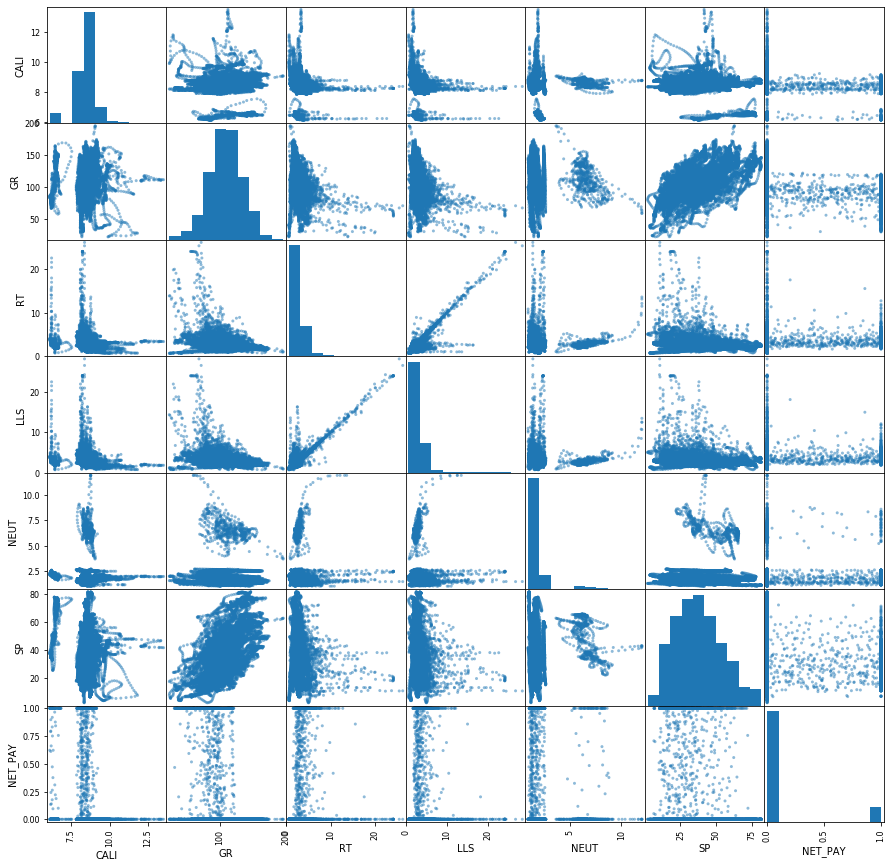

In [10]:
pd.plotting.scatter_matrix(data_j2b, figsize=(15, 15));

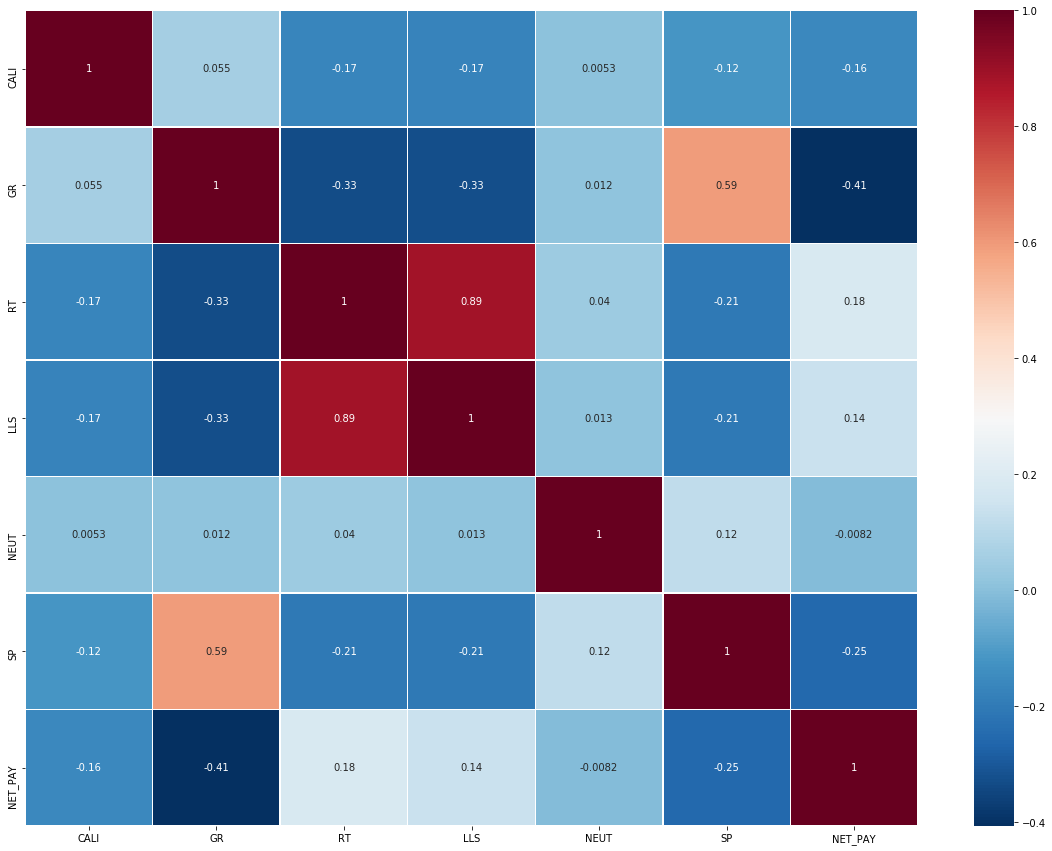

In [11]:
pearsoncorr = data_j2b.corr(method='pearson')
plt.subplots(figsize=(20,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [12]:
data_j2b.describe()

,CALI,GR,RT,LLS,NEUT,SP,NET_PAY
count,11846.000000,11846.000000,11846.000000,11846.000000,11846.000000,11846.000000,11846.000000
mean,8.467415,108.126938,2.773801,3.026926,1.868502,37.799472,0.131450
std,0.693280,25.203412,1.771433,1.815315,1.205399,16.460119,0.330091
min,6.093731,22.861088,0.613810,0.675193,0.951743,2.100858,0.000000
25%,8.246338,92.127617,1.885075,2.105952,1.313407,25.228861,0.000000
50%,8.480404,108.595753,2.428174,2.657646,1.598841,36.355339,0.000000
75%,8.732357,124.723701,3.134017,3.377029,1.852934,48.689291,0.000000
max,13.513808,195.854614,26.202894,28.322756,11.972537,81.532074,1.000000


In [13]:
scaler = StandardScaler()
scaler.fit(data_j2b)
data_j2b_sc = scaler.transform(data_j2b)
data_j2b_sc = pd.DataFrame(data=data_j2b_sc, index = data_j2b.index, columns = data_j2b.columns)
data_j2b_sc['NET_PAY'] = data_j2b['NET_PAY']

In [14]:
scaler = StandardScaler()
scaler.fit(val_j2b)
val_j2b_sc= scaler.transform(val_j2b)
val_j2b_sc = pd.DataFrame(data=val_j2b_sc, index =val_j2b.index, columns = val_j2b.columns )
val_j2b_sc['NET_PAY'] = val_j2b['NET_PAY']

In [15]:
def disbalance(list):
    ones = 0
    zeros = 0
    disbalance = 0
    for i in list:
        if i == 1:
            ones += 1
        else: zeros +=1
    disbalanced = (1/(ones/zeros))
    if int(disbalanced) > 1:
        return print('Несбалансированно', disbalanced)
    else: return ('Сбалансировано')

In [16]:
disbalance(data_j2b_sc['NET_PAY'])

Несбалансированно 7.634110787172012


In [17]:
train, test = train_test_split(data_j2b_sc, shuffle=False, test_size=0.25)

In [18]:
train_features = train.drop('NET_PAY', axis = 1)
test_features = test.drop('NET_PAY', axis = 1)
train_target = train['NET_PAY'].astype(int)
test_target = test['NET_PAY'].astype(int)

In [19]:
test_target

361778    0
361779    0
361780    0
361781    0
361782    0
         ..
464752    0
464753    0
464754    0
464755    0
464756    0
Name: NET_PAY, Length: 2962, dtype: int32

In [20]:
data_features = data_j2b_sc.drop('NET_PAY', axis = 1)
data_target = data_j2b_sc['NET_PAY'].astype(int)

In [21]:
val_features = val_j2b_sc.drop('NET_PAY', axis = 1)
val_target = val_j2b_sc['NET_PAY'].astype(int)

In [44]:
def f1_model_random(model):
    f1 = 0
    best = 0
    grid = 0
    accuracy_column_auc = []
    accuracy_column = []
    f1_column = []

 #__________________________________________   
    if model in "RandomForestClassifier":
        grid = {
            'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
            #'criterion':['gini'],
            'max_depth':[int(x) for x in np.linspace(start = 1, stop = 500, num = 10)],
            'min_samples_split':[0.01,0.1, 1.0, 10, 100, 1000],
            'min_samples_leaf':[0.01, 0.1, 0.2, 0.3, 0.4, 0.5,1,10,100,1000],
            #'min_weight_fraction_leaf':[0.0],
            'max_features':['auto'],
            'max_leaf_nodes':[100],
            #'min_impurity_decrease':[0.0],
            #'min_impurity_split':[None],
            'bootstrap':[True, False],
            #'oob_score':[False],
            'n_jobs':[-1],
            'random_state':[12345],
            'verbose':[0],
            #'warm_start':[False],
            'class_weight':['balanced'],
            #'ccp_alpha':[0.0],
            #'max_samples':[None],
        }
    
        ranforclas=RandomForestClassifier();
        ranforclas_cv=RandomizedSearchCV(estimator = ranforclas,param_distributions = grid,scoring = 'f1',
                                     n_iter = 100,cv= 5, verbose=0, random_state=12345, n_jobs=-1);
        ranforclas_cv.fit(train_features, train_target);
        best = ranforclas_cv.best_params_        
    
        ranforclas=RandomForestClassifier(**best)
        ranforclas.fit(train_features, train_target)
        predicted_test = ranforclas.predict(test_features)
        f1=f1_score(test_target, predicted_test)
        
        answer_proba = ranforclas.predict_proba(test_features)
        answer_proba_one = answer_proba[:,1]
        auc_roc= roc_auc_score(test_target, answer_proba_one)

        fpr, tpr, thresholds = roc_curve(test_target, answer_proba_one)
        
        plt.figure()
        plt.plot([0, 1], [0, 1], linestyle= '--')
        plt.step(fpr, tpr, where = 'post')
        plt.ylim([0.0, 1.0])
        plt.xlim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

        plt.title('ROC-кривая')
        plt.show()
        
        f1_column.append(f1)
        accuracy_column_auc.append(auc_roc)
        df = pd.DataFrame({"auc_roc" : accuracy_column_auc,"f1" : f1_column})
        
        print("RandomForestClassifier f1_test:",f1)
        print(df)
        return df, best
    
  #__________________________________________   
   
    if model in "CatBoostClassifier":
        grid = {
            'early_stopping_rounds':[10],
            'iterations':[int(x) for x in np.linspace(start = 50, stop = 300, num = 6)],
            'learning_rate':[float(x) for x in np.linspace(start = 0.01, stop = 1, num =10)],
            'depth':[int(x) for x in np.linspace(start = 2, stop = 16, num = 8)],
            'loss_function': ['Logloss'],
        }
        
        cbc= CatBoostClassifier() # классификатор
        cbc_cv=RandomizedSearchCV(estimator = cbc,param_distributions = grid,scoring = 'f1',
                                  n_iter = 10,cv =5, verbose=0, random_state=12345);
        cbc_cv.fit(train_features, train_target); # обучение классификатора
        best = cbc_cv.best_params_ 
        
        
        cbc=CatBoostClassifier(**best)
        cbc.fit(train_features, train_target)
        predicted_test = cbc.predict(test_features)
        f1=f1_score(test_target, predicted_test)
        print("CatBoostClassifier f1_test:",f1)
 #________________________________________________________________________________________
    if model in "LogisticRegression":
        grid = {
            "C":[0.001, 0.01, 0.1, 1.0,5.0, 10.0, 100.0], 
            "class_weight":[True, False],
            #"dual":[False],
            "fit_intercept":[True, False],
            "intercept_scaling":[1],
            #"l1_ratio":[None], 
            'max_iter':[int(x) for x in np.linspace(start = 1000, stop = 5500, num = 5)],
            'multi_class':['auto'],
            #'n_jobs':[None],
            'penalty':['l2'],
            'random_state':[12345], 
            'solver':['lbfgs','sag'], 
            'tol':[0.0001], 
            'verbose':[0],     
            #'warm_start':[True, False]  
        }

        logreg=LogisticRegression();
        logreg_cv=RandomizedSearchCV(estimator = logreg,param_distributions = grid,scoring = 'f1',
                                         n_iter = 100,cv =5, verbose=0, random_state=12345, n_jobs=-1);
        logreg_cv.fit(train_features, train_target);
        best = logreg_cv.best_params_        

        logreg=LogisticRegression(**best)
        logreg.fit(train_features, train_target)
        predicted_test = logreg.predict(test_features)
        f1=f1_score(test_target, predicted_test)
        print("LogisticRegression f1_test:",f1)
     #__________________________________________   


In [40]:
f1_model_random('LogisticRegression')

LogisticRegression f1_test: 0.3485380116959064


In [44]:
f1_model_random('CatBoostClassifier')

0:	learn: 0.5034560	total: 2.79s	remaining: 6m 55s
1:	learn: 0.3995610	total: 5.37s	remaining: 6m 37s
2:	learn: 0.3198540	total: 7.94s	remaining: 6m 29s
3:	learn: 0.2669712	total: 10.8s	remaining: 6m 32s
4:	learn: 0.2293795	total: 13.6s	remaining: 6m 33s
5:	learn: 0.1976081	total: 16.4s	remaining: 6m 33s
6:	learn: 0.1746474	total: 19.1s	remaining: 6m 31s
7:	learn: 0.1579882	total: 22s	remaining: 6m 30s
8:	learn: 0.1438431	total: 24.7s	remaining: 6m 26s
9:	learn: 0.1314641	total: 27.5s	remaining: 6m 24s
10:	learn: 0.1222049	total: 30.1s	remaining: 6m 20s
11:	learn: 0.1139718	total: 32.8s	remaining: 6m 16s
12:	learn: 0.1065225	total: 35.4s	remaining: 6m 12s
13:	learn: 0.0999077	total: 38s	remaining: 6m 8s
14:	learn: 0.0940965	total: 40.5s	remaining: 6m 4s
15:	learn: 0.0894699	total: 43.3s	remaining: 6m 2s
16:	learn: 0.0849046	total: 46.1s	remaining: 6m
17:	learn: 0.0814019	total: 48.7s	remaining: 5m 57s
18:	learn: 0.0777723	total: 51.3s	remaining: 5m 53s
19:	learn: 0.0742239	total: 53.9s

7:	learn: 0.1590055	total: 20.9s	remaining: 6m 10s
8:	learn: 0.1442659	total: 23.4s	remaining: 6m 6s
9:	learn: 0.1317106	total: 26s	remaining: 6m 3s
10:	learn: 0.1227503	total: 28.6s	remaining: 6m 1s
11:	learn: 0.1137035	total: 31.2s	remaining: 5m 59s
12:	learn: 0.1061645	total: 33.8s	remaining: 5m 56s
13:	learn: 0.0997575	total: 36.4s	remaining: 5m 53s
14:	learn: 0.0938090	total: 39s	remaining: 5m 50s
15:	learn: 0.0888638	total: 41.6s	remaining: 5m 48s
16:	learn: 0.0844364	total: 44.3s	remaining: 5m 46s
17:	learn: 0.0802118	total: 47.3s	remaining: 5m 47s
18:	learn: 0.0766665	total: 50s	remaining: 5m 44s
19:	learn: 0.0734714	total: 52.7s	remaining: 5m 42s
20:	learn: 0.0704977	total: 55.4s	remaining: 5m 40s
21:	learn: 0.0674271	total: 58s	remaining: 5m 37s
22:	learn: 0.0642285	total: 1m	remaining: 5m 34s
23:	learn: 0.0620778	total: 1m 3s	remaining: 5m 31s
24:	learn: 0.0597759	total: 1m 5s	remaining: 5m 28s
25:	learn: 0.0578267	total: 1m 8s	remaining: 5m 25s
26:	learn: 0.0559013	total: 1

14:	learn: 0.0916750	total: 40.2s	remaining: 6m 1s
15:	learn: 0.0872823	total: 42.7s	remaining: 5m 57s
16:	learn: 0.0834336	total: 45.3s	remaining: 5m 54s
17:	learn: 0.0795075	total: 47.8s	remaining: 5m 50s
18:	learn: 0.0756338	total: 50.4s	remaining: 5m 47s
19:	learn: 0.0723691	total: 53s	remaining: 5m 44s
20:	learn: 0.0695758	total: 55.6s	remaining: 5m 41s
21:	learn: 0.0669672	total: 58.1s	remaining: 5m 38s
22:	learn: 0.0641089	total: 1m	remaining: 5m 34s
23:	learn: 0.0618275	total: 1m 3s	remaining: 5m 31s
24:	learn: 0.0599133	total: 1m 5s	remaining: 5m 29s
25:	learn: 0.0577707	total: 1m 8s	remaining: 5m 26s
26:	learn: 0.0556509	total: 1m 11s	remaining: 5m 23s
27:	learn: 0.0537430	total: 1m 13s	remaining: 5m 20s
28:	learn: 0.0519324	total: 1m 16s	remaining: 5m 18s
29:	learn: 0.0502388	total: 1m 18s	remaining: 5m 15s
30:	learn: 0.0487950	total: 1m 21s	remaining: 5m 13s
31:	learn: 0.0475675	total: 1m 25s	remaining: 5m 13s
32:	learn: 0.0462760	total: 1m 27s	remaining: 5m 11s
33:	learn: 

21:	learn: 0.0643667	total: 58.7s	remaining: 5m 41s
22:	learn: 0.0620204	total: 1m 1s	remaining: 5m 39s
23:	learn: 0.0599884	total: 1m 4s	remaining: 5m 36s
24:	learn: 0.0580200	total: 1m 6s	remaining: 5m 33s
25:	learn: 0.0556453	total: 1m 9s	remaining: 5m 30s
26:	learn: 0.0539420	total: 1m 12s	remaining: 5m 28s
27:	learn: 0.0520525	total: 1m 14s	remaining: 5m 25s
28:	learn: 0.0499877	total: 1m 17s	remaining: 5m 22s
29:	learn: 0.0483837	total: 1m 19s	remaining: 5m 19s
30:	learn: 0.0468357	total: 1m 22s	remaining: 5m 18s
31:	learn: 0.0455289	total: 1m 25s	remaining: 5m 15s
32:	learn: 0.0441864	total: 1m 28s	remaining: 5m 13s
33:	learn: 0.0430032	total: 1m 31s	remaining: 5m 10s
34:	learn: 0.0417245	total: 1m 33s	remaining: 5m 8s
35:	learn: 0.0403729	total: 1m 36s	remaining: 5m 5s
36:	learn: 0.0391860	total: 1m 39s	remaining: 5m 2s
37:	learn: 0.0384016	total: 1m 41s	remaining: 5m
38:	learn: 0.0375081	total: 1m 44s	remaining: 4m 57s
39:	learn: 0.0365926	total: 1m 47s	remaining: 4m 54s
40:	l

28:	learn: 0.0516498	total: 1m 20s	remaining: 5m 34s
29:	learn: 0.0498900	total: 1m 22s	remaining: 5m 31s
30:	learn: 0.0483735	total: 1m 25s	remaining: 5m 28s
31:	learn: 0.0468924	total: 1m 28s	remaining: 5m 25s
32:	learn: 0.0450958	total: 1m 31s	remaining: 5m 22s
33:	learn: 0.0437409	total: 1m 33s	remaining: 5m 20s
34:	learn: 0.0422925	total: 1m 36s	remaining: 5m 17s
35:	learn: 0.0408024	total: 1m 39s	remaining: 5m 14s
36:	learn: 0.0397885	total: 1m 42s	remaining: 5m 11s
37:	learn: 0.0386833	total: 1m 44s	remaining: 5m 8s
38:	learn: 0.0376342	total: 1m 47s	remaining: 5m 6s
39:	learn: 0.0366257	total: 1m 50s	remaining: 5m 3s
40:	learn: 0.0356573	total: 1m 52s	remaining: 5m
41:	learn: 0.0347830	total: 1m 55s	remaining: 4m 56s
42:	learn: 0.0338962	total: 1m 58s	remaining: 4m 53s
43:	learn: 0.0331706	total: 2m	remaining: 4m 51s
44:	learn: 0.0325328	total: 2m 3s	remaining: 4m 48s
45:	learn: 0.0317659	total: 2m 6s	remaining: 4m 45s
46:	learn: 0.0312318	total: 2m 9s	remaining: 4m 43s
47:	lea

54:	learn: 0.4477320	total: 156ms	remaining: 128ms
55:	learn: 0.4448966	total: 158ms	remaining: 124ms
56:	learn: 0.4420694	total: 161ms	remaining: 121ms
57:	learn: 0.4393365	total: 163ms	remaining: 118ms
58:	learn: 0.4366889	total: 165ms	remaining: 115ms
59:	learn: 0.4340277	total: 167ms	remaining: 112ms
60:	learn: 0.4314766	total: 170ms	remaining: 108ms
61:	learn: 0.4288302	total: 172ms	remaining: 105ms
62:	learn: 0.4262483	total: 174ms	remaining: 102ms
63:	learn: 0.4237145	total: 176ms	remaining: 99.1ms
64:	learn: 0.4212242	total: 178ms	remaining: 96ms
65:	learn: 0.4189201	total: 181ms	remaining: 93ms
66:	learn: 0.4165773	total: 183ms	remaining: 90ms
67:	learn: 0.4141739	total: 185ms	remaining: 87.1ms
68:	learn: 0.4118350	total: 187ms	remaining: 84.1ms
69:	learn: 0.4094825	total: 189ms	remaining: 81.2ms
70:	learn: 0.4071906	total: 192ms	remaining: 78.3ms
71:	learn: 0.4048973	total: 194ms	remaining: 75.5ms
72:	learn: 0.4026177	total: 197ms	remaining: 72.7ms
73:	learn: 0.4004429	total:

68:	learn: 0.4297747	total: 193ms	remaining: 86.6ms
69:	learn: 0.4276203	total: 195ms	remaining: 83.8ms
70:	learn: 0.4255322	total: 198ms	remaining: 81ms
71:	learn: 0.4234252	total: 202ms	remaining: 78.4ms
72:	learn: 0.4213228	total: 205ms	remaining: 75.7ms
73:	learn: 0.4192770	total: 207ms	remaining: 72.9ms
74:	learn: 0.4172197	total: 210ms	remaining: 70ms
75:	learn: 0.4152380	total: 213ms	remaining: 67.2ms
76:	learn: 0.4133062	total: 216ms	remaining: 64.5ms
77:	learn: 0.4114462	total: 219ms	remaining: 61.7ms
78:	learn: 0.4094902	total: 222ms	remaining: 59ms
79:	learn: 0.4077054	total: 225ms	remaining: 56.2ms
80:	learn: 0.4058338	total: 227ms	remaining: 53.4ms
81:	learn: 0.4040241	total: 230ms	remaining: 50.5ms
82:	learn: 0.4023450	total: 233ms	remaining: 47.6ms
83:	learn: 0.4005222	total: 236ms	remaining: 44.9ms
84:	learn: 0.3987111	total: 238ms	remaining: 42.1ms
85:	learn: 0.3970725	total: 241ms	remaining: 39.2ms
86:	learn: 0.3954302	total: 244ms	remaining: 36.4ms
87:	learn: 0.39381

49:	learn: 0.4764506	total: 205ms	remaining: 205ms
50:	learn: 0.4736349	total: 208ms	remaining: 200ms
51:	learn: 0.4710225	total: 211ms	remaining: 195ms
52:	learn: 0.4682606	total: 217ms	remaining: 192ms
53:	learn: 0.4657644	total: 220ms	remaining: 187ms
54:	learn: 0.4630984	total: 225ms	remaining: 184ms
55:	learn: 0.4603769	total: 228ms	remaining: 179ms
56:	learn: 0.4579621	total: 239ms	remaining: 180ms
57:	learn: 0.4554130	total: 242ms	remaining: 175ms
58:	learn: 0.4531206	total: 245ms	remaining: 170ms
59:	learn: 0.4507029	total: 248ms	remaining: 165ms
60:	learn: 0.4482578	total: 252ms	remaining: 161ms
61:	learn: 0.4457152	total: 255ms	remaining: 156ms
62:	learn: 0.4434281	total: 258ms	remaining: 151ms
63:	learn: 0.4412566	total: 261ms	remaining: 147ms
64:	learn: 0.4389949	total: 264ms	remaining: 142ms
65:	learn: 0.4366979	total: 268ms	remaining: 138ms
66:	learn: 0.4345561	total: 280ms	remaining: 138ms
67:	learn: 0.4323861	total: 286ms	remaining: 135ms
68:	learn: 0.4302377	total: 290

109:	learn: 0.1179384	total: 1m 15s	remaining: 1m 1s
110:	learn: 0.1170384	total: 1m 15s	remaining: 1m
111:	learn: 0.1161104	total: 1m 16s	remaining: 1m
112:	learn: 0.1151000	total: 1m 17s	remaining: 59.4s
113:	learn: 0.1141377	total: 1m 17s	remaining: 58.7s
114:	learn: 0.1132282	total: 1m 18s	remaining: 58.1s
115:	learn: 0.1123977	total: 1m 19s	remaining: 57.4s
116:	learn: 0.1114275	total: 1m 19s	remaining: 56.7s
117:	learn: 0.1105397	total: 1m 20s	remaining: 56s
118:	learn: 0.1097129	total: 1m 21s	remaining: 55.3s
119:	learn: 0.1088462	total: 1m 21s	remaining: 54.6s
120:	learn: 0.1079885	total: 1m 22s	remaining: 54s
121:	learn: 0.1071583	total: 1m 23s	remaining: 53.3s
122:	learn: 0.1063741	total: 1m 23s	remaining: 52.6s
123:	learn: 0.1056819	total: 1m 24s	remaining: 51.9s
124:	learn: 0.1048345	total: 1m 25s	remaining: 51.2s
125:	learn: 0.1040269	total: 1m 26s	remaining: 50.6s
126:	learn: 0.1033412	total: 1m 26s	remaining: 49.9s
127:	learn: 0.1024848	total: 1m 27s	remaining: 49.2s
128

67:	learn: 0.1796796	total: 46.8s	remaining: 1m 30s
68:	learn: 0.1773039	total: 47.5s	remaining: 1m 30s
69:	learn: 0.1749500	total: 48.1s	remaining: 1m 29s
70:	learn: 0.1727334	total: 48.8s	remaining: 1m 28s
71:	learn: 0.1709555	total: 49.4s	remaining: 1m 27s
72:	learn: 0.1688743	total: 50.1s	remaining: 1m 27s
73:	learn: 0.1665991	total: 50.8s	remaining: 1m 26s
74:	learn: 0.1645945	total: 51.5s	remaining: 1m 25s
75:	learn: 0.1625202	total: 52.1s	remaining: 1m 25s
76:	learn: 0.1605789	total: 52.8s	remaining: 1m 24s
77:	learn: 0.1586546	total: 53.4s	remaining: 1m 23s
78:	learn: 0.1567087	total: 54.1s	remaining: 1m 22s
79:	learn: 0.1548091	total: 54.7s	remaining: 1m 22s
80:	learn: 0.1532242	total: 55.4s	remaining: 1m 21s
81:	learn: 0.1514705	total: 56s	remaining: 1m 20s
82:	learn: 0.1500251	total: 56.7s	remaining: 1m 19s
83:	learn: 0.1482599	total: 57.3s	remaining: 1m 19s
84:	learn: 0.1465714	total: 58s	remaining: 1m 18s
85:	learn: 0.1449229	total: 58.7s	remaining: 1m 17s
86:	learn: 0.143

25:	learn: 0.3613162	total: 18s	remaining: 2m
26:	learn: 0.3537305	total: 18.7s	remaining: 1m 59s
27:	learn: 0.3464303	total: 19.3s	remaining: 1m 58s
28:	learn: 0.3389495	total: 20s	remaining: 1m 57s
29:	learn: 0.3315941	total: 20.6s	remaining: 1m 56s
30:	learn: 0.3243002	total: 21.3s	remaining: 1m 56s
31:	learn: 0.3180660	total: 22s	remaining: 1m 55s
32:	learn: 0.3112423	total: 22.7s	remaining: 1m 54s
33:	learn: 0.3054804	total: 23.3s	remaining: 1m 53s
34:	learn: 0.2993470	total: 24s	remaining: 1m 53s
35:	learn: 0.2939483	total: 24.6s	remaining: 1m 52s
36:	learn: 0.2886079	total: 25.3s	remaining: 1m 51s
37:	learn: 0.2838805	total: 26s	remaining: 1m 50s
38:	learn: 0.2785801	total: 26.6s	remaining: 1m 49s
39:	learn: 0.2734813	total: 27.3s	remaining: 1m 49s
40:	learn: 0.2681799	total: 27.9s	remaining: 1m 48s
41:	learn: 0.2633838	total: 28.6s	remaining: 1m 47s
42:	learn: 0.2589517	total: 29.3s	remaining: 1m 46s
43:	learn: 0.2545647	total: 29.9s	remaining: 1m 46s
44:	learn: 0.2502105	total

183:	learn: 0.0703243	total: 2m 2s	remaining: 10.7s
184:	learn: 0.0699665	total: 2m 3s	remaining: 10s
185:	learn: 0.0696066	total: 2m 4s	remaining: 9.34s
186:	learn: 0.0692756	total: 2m 4s	remaining: 8.67s
187:	learn: 0.0689135	total: 2m 5s	remaining: 8s
188:	learn: 0.0685206	total: 2m 6s	remaining: 7.33s
189:	learn: 0.0682016	total: 2m 6s	remaining: 6.67s
190:	learn: 0.0678633	total: 2m 7s	remaining: 6s
191:	learn: 0.0675452	total: 2m 8s	remaining: 5.33s
192:	learn: 0.0672302	total: 2m 8s	remaining: 4.67s
193:	learn: 0.0668945	total: 2m 9s	remaining: 4s
194:	learn: 0.0665329	total: 2m 9s	remaining: 3.33s
195:	learn: 0.0661908	total: 2m 10s	remaining: 2.67s
196:	learn: 0.0659798	total: 2m 11s	remaining: 2s
197:	learn: 0.0656990	total: 2m 11s	remaining: 1.33s
198:	learn: 0.0653900	total: 2m 12s	remaining: 666ms
199:	learn: 0.0650824	total: 2m 13s	remaining: 0us
0:	learn: 0.6741825	total: 655ms	remaining: 2m 10s
1:	learn: 0.6568581	total: 1.47s	remaining: 2m 25s
2:	learn: 0.6403733	total

141:	learn: 0.0915830	total: 1m 36s	remaining: 39.3s
142:	learn: 0.0911047	total: 1m 36s	remaining: 38.6s
143:	learn: 0.0906172	total: 1m 37s	remaining: 37.9s
144:	learn: 0.0899822	total: 1m 38s	remaining: 37.3s
145:	learn: 0.0894400	total: 1m 38s	remaining: 36.6s
146:	learn: 0.0888872	total: 1m 39s	remaining: 35.9s
147:	learn: 0.0883896	total: 1m 40s	remaining: 35.3s
148:	learn: 0.0877470	total: 1m 41s	remaining: 34.6s
149:	learn: 0.0871119	total: 1m 41s	remaining: 33.9s
150:	learn: 0.0866025	total: 1m 42s	remaining: 33.3s
151:	learn: 0.0860899	total: 1m 43s	remaining: 32.6s
152:	learn: 0.0855222	total: 1m 44s	remaining: 32s
153:	learn: 0.0848920	total: 1m 44s	remaining: 31.3s
154:	learn: 0.0843369	total: 1m 45s	remaining: 30.6s
155:	learn: 0.0838837	total: 1m 46s	remaining: 29.9s
156:	learn: 0.0833990	total: 1m 46s	remaining: 29.3s
157:	learn: 0.0829563	total: 1m 47s	remaining: 28.6s
158:	learn: 0.0824361	total: 1m 48s	remaining: 27.9s
159:	learn: 0.0820303	total: 1m 48s	remaining: 2

99:	learn: 0.1285458	total: 1m 10s	remaining: 1m 10s
100:	learn: 0.1272911	total: 1m 11s	remaining: 1m 9s
101:	learn: 0.1259296	total: 1m 11s	remaining: 1m 8s
102:	learn: 0.1245475	total: 1m 12s	remaining: 1m 8s
103:	learn: 0.1235121	total: 1m 13s	remaining: 1m 7s
104:	learn: 0.1221912	total: 1m 13s	remaining: 1m 6s
105:	learn: 0.1212035	total: 1m 14s	remaining: 1m 6s
106:	learn: 0.1202235	total: 1m 15s	remaining: 1m 5s
107:	learn: 0.1190800	total: 1m 15s	remaining: 1m 4s
108:	learn: 0.1179249	total: 1m 16s	remaining: 1m 3s
109:	learn: 0.1167877	total: 1m 17s	remaining: 1m 3s
110:	learn: 0.1157347	total: 1m 17s	remaining: 1m 2s
111:	learn: 0.1147860	total: 1m 18s	remaining: 1m 1s
112:	learn: 0.1137722	total: 1m 19s	remaining: 1m 1s
113:	learn: 0.1127830	total: 1m 20s	remaining: 1m
114:	learn: 0.1118978	total: 1m 20s	remaining: 59.7s
115:	learn: 0.1109071	total: 1m 21s	remaining: 58.9s
116:	learn: 0.1100494	total: 1m 22s	remaining: 58.2s
117:	learn: 0.1091736	total: 1m 22s	remaining: 57

70:	learn: 0.0069315	total: 537ms	remaining: 976ms
71:	learn: 0.0067852	total: 545ms	remaining: 969ms
72:	learn: 0.0066994	total: 552ms	remaining: 961ms
73:	learn: 0.0065368	total: 560ms	remaining: 953ms
74:	learn: 0.0064527	total: 567ms	remaining: 945ms
75:	learn: 0.0062118	total: 576ms	remaining: 940ms
76:	learn: 0.0060795	total: 588ms	remaining: 939ms
77:	learn: 0.0059394	total: 611ms	remaining: 955ms
78:	learn: 0.0057847	total: 623ms	remaining: 955ms
79:	learn: 0.0056727	total: 635ms	remaining: 953ms
80:	learn: 0.0055882	total: 646ms	remaining: 949ms
81:	learn: 0.0055478	total: 664ms	remaining: 955ms
82:	learn: 0.0053664	total: 695ms	remaining: 980ms
83:	learn: 0.0051623	total: 710ms	remaining: 980ms
84:	learn: 0.0050940	total: 725ms	remaining: 981ms
85:	learn: 0.0048854	total: 751ms	remaining: 996ms
86:	learn: 0.0048059	total: 775ms	remaining: 1.01s
87:	learn: 0.0047404	total: 805ms	remaining: 1.02s
88:	learn: 0.0046643	total: 826ms	remaining: 1.03s
89:	learn: 0.0046257	total: 836

51:	learn: 0.0099434	total: 424ms	remaining: 1.21s
52:	learn: 0.0093440	total: 431ms	remaining: 1.19s
53:	learn: 0.0089003	total: 438ms	remaining: 1.18s
54:	learn: 0.0086420	total: 445ms	remaining: 1.17s
55:	learn: 0.0083572	total: 452ms	remaining: 1.16s
56:	learn: 0.0082317	total: 461ms	remaining: 1.16s
57:	learn: 0.0080489	total: 468ms	remaining: 1.15s
58:	learn: 0.0078893	total: 476ms	remaining: 1.14s
59:	learn: 0.0075568	total: 483ms	remaining: 1.13s
60:	learn: 0.0073983	total: 490ms	remaining: 1.12s
61:	learn: 0.0072619	total: 497ms	remaining: 1.11s
62:	learn: 0.0070675	total: 504ms	remaining: 1.1s
63:	learn: 0.0069542	total: 511ms	remaining: 1.09s
64:	learn: 0.0067731	total: 518ms	remaining: 1.08s
65:	learn: 0.0065923	total: 526ms	remaining: 1.07s
66:	learn: 0.0063296	total: 533ms	remaining: 1.06s
67:	learn: 0.0062528	total: 540ms	remaining: 1.05s
68:	learn: 0.0061921	total: 547ms	remaining: 1.04s
69:	learn: 0.0060417	total: 555ms	remaining: 1.03s
70:	learn: 0.0059713	total: 562m

13:	learn: 0.0595799	total: 119ms	remaining: 1.58s
14:	learn: 0.0547228	total: 128ms	remaining: 1.58s
15:	learn: 0.0524984	total: 137ms	remaining: 1.58s
16:	learn: 0.0500038	total: 145ms	remaining: 1.56s
17:	learn: 0.0469425	total: 154ms	remaining: 1.56s
18:	learn: 0.0428581	total: 161ms	remaining: 1.54s
19:	learn: 0.0394621	total: 170ms	remaining: 1.53s
20:	learn: 0.0378273	total: 178ms	remaining: 1.51s
21:	learn: 0.0366018	total: 192ms	remaining: 1.55s
22:	learn: 0.0347714	total: 201ms	remaining: 1.55s
23:	learn: 0.0332314	total: 210ms	remaining: 1.54s
24:	learn: 0.0320145	total: 219ms	remaining: 1.53s
25:	learn: 0.0314037	total: 226ms	remaining: 1.51s
26:	learn: 0.0298106	total: 234ms	remaining: 1.5s
27:	learn: 0.0283922	total: 242ms	remaining: 1.49s
28:	learn: 0.0269591	total: 249ms	remaining: 1.47s
29:	learn: 0.0261508	total: 257ms	remaining: 1.46s
30:	learn: 0.0244603	total: 266ms	remaining: 1.45s
31:	learn: 0.0222792	total: 274ms	remaining: 1.44s
32:	learn: 0.0214976	total: 282m

177:	learn: 0.0017162	total: 1.54s	remaining: 190ms
178:	learn: 0.0016959	total: 1.56s	remaining: 184ms
179:	learn: 0.0016959	total: 1.59s	remaining: 177ms
180:	learn: 0.0016959	total: 1.61s	remaining: 169ms
181:	learn: 0.0016958	total: 1.63s	remaining: 161ms
182:	learn: 0.0016746	total: 1.64s	remaining: 152ms
183:	learn: 0.0016746	total: 1.65s	remaining: 143ms
184:	learn: 0.0016595	total: 1.65s	remaining: 134ms
185:	learn: 0.0016403	total: 1.66s	remaining: 125ms
186:	learn: 0.0016399	total: 1.67s	remaining: 116ms
187:	learn: 0.0016234	total: 1.68s	remaining: 107ms
188:	learn: 0.0016233	total: 1.69s	remaining: 98.3ms
189:	learn: 0.0016233	total: 1.7s	remaining: 89.4ms
190:	learn: 0.0016227	total: 1.7s	remaining: 80.3ms
191:	learn: 0.0016225	total: 1.71s	remaining: 71.4ms
192:	learn: 0.0016225	total: 1.72s	remaining: 62.5ms
193:	learn: 0.0016224	total: 1.73s	remaining: 53.6ms
194:	learn: 0.0016224	total: 1.74s	remaining: 44.6ms
195:	learn: 0.0016224	total: 1.75s	remaining: 35.7ms
196:	l

140:	learn: 0.0018653	total: 1.11s	remaining: 467ms
141:	learn: 0.0018440	total: 1.12s	remaining: 459ms
142:	learn: 0.0018284	total: 1.13s	remaining: 450ms
143:	learn: 0.0018284	total: 1.14s	remaining: 442ms
144:	learn: 0.0018284	total: 1.14s	remaining: 434ms
145:	learn: 0.0018283	total: 1.15s	remaining: 425ms
146:	learn: 0.0018282	total: 1.16s	remaining: 416ms
147:	learn: 0.0018281	total: 1.16s	remaining: 408ms
148:	learn: 0.0018279	total: 1.17s	remaining: 400ms
149:	learn: 0.0017981	total: 1.17s	remaining: 392ms
150:	learn: 0.0017980	total: 1.18s	remaining: 383ms
151:	learn: 0.0017979	total: 1.19s	remaining: 375ms
152:	learn: 0.0017979	total: 1.19s	remaining: 367ms
153:	learn: 0.0017976	total: 1.2s	remaining: 358ms
154:	learn: 0.0017807	total: 1.21s	remaining: 350ms
155:	learn: 0.0017806	total: 1.21s	remaining: 342ms
156:	learn: 0.0017625	total: 1.22s	remaining: 334ms
157:	learn: 0.0017363	total: 1.23s	remaining: 326ms
158:	learn: 0.0017125	total: 1.23s	remaining: 318ms
159:	learn: 0

116:	learn: 0.0027713	total: 1.13s	remaining: 800ms
117:	learn: 0.0027229	total: 1.14s	remaining: 790ms
118:	learn: 0.0026297	total: 1.14s	remaining: 779ms
119:	learn: 0.0025792	total: 1.15s	remaining: 768ms
120:	learn: 0.0025100	total: 1.16s	remaining: 756ms
121:	learn: 0.0024857	total: 1.17s	remaining: 745ms
122:	learn: 0.0024567	total: 1.17s	remaining: 734ms
123:	learn: 0.0024275	total: 1.18s	remaining: 723ms
124:	learn: 0.0023472	total: 1.19s	remaining: 712ms
125:	learn: 0.0023472	total: 1.19s	remaining: 701ms
126:	learn: 0.0023086	total: 1.2s	remaining: 690ms
127:	learn: 0.0022656	total: 1.21s	remaining: 679ms
128:	learn: 0.0022269	total: 1.21s	remaining: 669ms
129:	learn: 0.0022269	total: 1.22s	remaining: 657ms
130:	learn: 0.0022201	total: 1.23s	remaining: 646ms
131:	learn: 0.0021977	total: 1.23s	remaining: 636ms
132:	learn: 0.0021679	total: 1.24s	remaining: 625ms
133:	learn: 0.0021463	total: 1.25s	remaining: 615ms
134:	learn: 0.0021300	total: 1.26s	remaining: 605ms
135:	learn: 0

92:	learn: 0.0043887	total: 960ms	remaining: 1.62s
93:	learn: 0.0043539	total: 968ms	remaining: 1.61s
94:	learn: 0.0043475	total: 976ms	remaining: 1.59s
95:	learn: 0.0042500	total: 983ms	remaining: 1.58s
96:	learn: 0.0041764	total: 991ms	remaining: 1.56s
97:	learn: 0.0040837	total: 998ms	remaining: 1.55s
98:	learn: 0.0040089	total: 1s	remaining: 1.53s
99:	learn: 0.0039486	total: 1.01s	remaining: 1.52s
100:	learn: 0.0039015	total: 1.02s	remaining: 1.51s
101:	learn: 0.0038655	total: 1.03s	remaining: 1.49s
102:	learn: 0.0038405	total: 1.03s	remaining: 1.48s
103:	learn: 0.0037553	total: 1.04s	remaining: 1.46s
104:	learn: 0.0037386	total: 1.05s	remaining: 1.45s
105:	learn: 0.0037243	total: 1.06s	remaining: 1.44s
106:	learn: 0.0036862	total: 1.06s	remaining: 1.42s
107:	learn: 0.0036698	total: 1.07s	remaining: 1.41s
108:	learn: 0.0036049	total: 1.08s	remaining: 1.39s
109:	learn: 0.0035764	total: 1.08s	remaining: 1.38s
110:	learn: 0.0035487	total: 1.09s	remaining: 1.37s
111:	learn: 0.0034174	t

0:	learn: 0.2175986	total: 15.3ms	remaining: 3.81s
1:	learn: 0.1602914	total: 29.7ms	remaining: 3.68s
2:	learn: 0.1416110	total: 82.2ms	remaining: 6.77s
3:	learn: 0.1308291	total: 115ms	remaining: 7.07s
4:	learn: 0.1205138	total: 137ms	remaining: 6.7s
5:	learn: 0.1097790	total: 155ms	remaining: 6.32s
6:	learn: 0.1007811	total: 166ms	remaining: 5.77s
7:	learn: 0.0939093	total: 177ms	remaining: 5.36s
8:	learn: 0.0882084	total: 188ms	remaining: 5.02s
9:	learn: 0.0834118	total: 200ms	remaining: 4.8s
10:	learn: 0.0783806	total: 207ms	remaining: 4.5s
11:	learn: 0.0742590	total: 217ms	remaining: 4.3s
12:	learn: 0.0685888	total: 224ms	remaining: 4.09s
13:	learn: 0.0637251	total: 233ms	remaining: 3.93s
14:	learn: 0.0551417	total: 241ms	remaining: 3.77s
15:	learn: 0.0509484	total: 249ms	remaining: 3.64s
16:	learn: 0.0468964	total: 260ms	remaining: 3.56s
17:	learn: 0.0450269	total: 268ms	remaining: 3.46s
18:	learn: 0.0415654	total: 278ms	remaining: 3.38s
19:	learn: 0.0390446	total: 286ms	remainin

175:	learn: 0.0020281	total: 1.42s	remaining: 597ms
176:	learn: 0.0020032	total: 1.43s	remaining: 589ms
177:	learn: 0.0020029	total: 1.43s	remaining: 580ms
178:	learn: 0.0019919	total: 1.44s	remaining: 571ms
179:	learn: 0.0019919	total: 1.45s	remaining: 562ms
180:	learn: 0.0019919	total: 1.45s	remaining: 553ms
181:	learn: 0.0019918	total: 1.46s	remaining: 545ms
182:	learn: 0.0019711	total: 1.47s	remaining: 536ms
183:	learn: 0.0019710	total: 1.47s	remaining: 528ms
184:	learn: 0.0019709	total: 1.48s	remaining: 519ms
185:	learn: 0.0019708	total: 1.48s	remaining: 510ms
186:	learn: 0.0019708	total: 1.49s	remaining: 502ms
187:	learn: 0.0019708	total: 1.5s	remaining: 493ms
188:	learn: 0.0019708	total: 1.5s	remaining: 485ms
189:	learn: 0.0019707	total: 1.51s	remaining: 476ms
190:	learn: 0.0019707	total: 1.51s	remaining: 467ms
191:	learn: 0.0019702	total: 1.52s	remaining: 459ms
192:	learn: 0.0019700	total: 1.52s	remaining: 451ms
193:	learn: 0.0019700	total: 1.53s	remaining: 442ms
194:	learn: 0.

94:	learn: 0.0038505	total: 898ms	remaining: 1.46s
95:	learn: 0.0037201	total: 908ms	remaining: 1.46s
96:	learn: 0.0036744	total: 917ms	remaining: 1.45s
97:	learn: 0.0035976	total: 927ms	remaining: 1.44s
98:	learn: 0.0035670	total: 936ms	remaining: 1.43s
99:	learn: 0.0035428	total: 946ms	remaining: 1.42s
100:	learn: 0.0033700	total: 955ms	remaining: 1.41s
101:	learn: 0.0033351	total: 969ms	remaining: 1.41s
102:	learn: 0.0032711	total: 976ms	remaining: 1.39s
103:	learn: 0.0032033	total: 986ms	remaining: 1.38s
104:	learn: 0.0031338	total: 994ms	remaining: 1.37s
105:	learn: 0.0031126	total: 1s	remaining: 1.36s
106:	learn: 0.0031125	total: 1.01s	remaining: 1.35s
107:	learn: 0.0030723	total: 1.02s	remaining: 1.34s
108:	learn: 0.0030086	total: 1.03s	remaining: 1.33s
109:	learn: 0.0028981	total: 1.03s	remaining: 1.32s
110:	learn: 0.0028652	total: 1.04s	remaining: 1.31s
111:	learn: 0.0027628	total: 1.05s	remaining: 1.3s
112:	learn: 0.0027210	total: 1.06s	remaining: 1.28s
113:	learn: 0.0026921	

7:	learn: 0.0970493	total: 130ms	remaining: 3.94s
8:	learn: 0.0908152	total: 144ms	remaining: 3.86s
9:	learn: 0.0811660	total: 168ms	remaining: 4.03s
10:	learn: 0.0746821	total: 188ms	remaining: 4.09s
11:	learn: 0.0683307	total: 196ms	remaining: 3.88s
12:	learn: 0.0644183	total: 205ms	remaining: 3.73s
13:	learn: 0.0583800	total: 212ms	remaining: 3.57s
14:	learn: 0.0533114	total: 220ms	remaining: 3.45s
15:	learn: 0.0496777	total: 227ms	remaining: 3.33s
16:	learn: 0.0462664	total: 236ms	remaining: 3.24s
17:	learn: 0.0428845	total: 246ms	remaining: 3.17s
18:	learn: 0.0391790	total: 254ms	remaining: 3.08s
19:	learn: 0.0361820	total: 262ms	remaining: 3.02s
20:	learn: 0.0337674	total: 274ms	remaining: 2.98s
21:	learn: 0.0326503	total: 282ms	remaining: 2.92s
22:	learn: 0.0299285	total: 291ms	remaining: 2.87s
23:	learn: 0.0277549	total: 300ms	remaining: 2.83s
24:	learn: 0.0273815	total: 308ms	remaining: 2.77s
25:	learn: 0.0253077	total: 316ms	remaining: 2.72s
26:	learn: 0.0233870	total: 325ms	

168:	learn: 0.0017123	total: 1.53s	remaining: 734ms
169:	learn: 0.0016863	total: 1.54s	remaining: 725ms
170:	learn: 0.0016862	total: 1.55s	remaining: 715ms
171:	learn: 0.0016862	total: 1.56s	remaining: 707ms
172:	learn: 0.0016862	total: 1.56s	remaining: 697ms
173:	learn: 0.0016862	total: 1.58s	remaining: 688ms
174:	learn: 0.0016860	total: 1.58s	remaining: 679ms
175:	learn: 0.0016859	total: 1.59s	remaining: 670ms
176:	learn: 0.0016859	total: 1.6s	remaining: 662ms
177:	learn: 0.0016587	total: 1.63s	remaining: 658ms
178:	learn: 0.0016587	total: 1.63s	remaining: 648ms
179:	learn: 0.0016587	total: 1.64s	remaining: 639ms
180:	learn: 0.0016532	total: 1.65s	remaining: 630ms
181:	learn: 0.0016532	total: 1.66s	remaining: 620ms
182:	learn: 0.0016504	total: 1.67s	remaining: 611ms
183:	learn: 0.0016503	total: 1.68s	remaining: 601ms
184:	learn: 0.0016503	total: 1.68s	remaining: 591ms
185:	learn: 0.0016503	total: 1.69s	remaining: 581ms
186:	learn: 0.0016502	total: 1.7s	remaining: 572ms
187:	learn: 0.

91:	learn: 0.0038282	total: 918ms	remaining: 1.58s
92:	learn: 0.0037719	total: 926ms	remaining: 1.56s
93:	learn: 0.0037248	total: 936ms	remaining: 1.55s
94:	learn: 0.0036618	total: 945ms	remaining: 1.54s
95:	learn: 0.0036324	total: 953ms	remaining: 1.53s
96:	learn: 0.0036021	total: 963ms	remaining: 1.52s
97:	learn: 0.0035556	total: 970ms	remaining: 1.5s
98:	learn: 0.0035387	total: 978ms	remaining: 1.49s
99:	learn: 0.0034993	total: 986ms	remaining: 1.48s
100:	learn: 0.0034722	total: 994ms	remaining: 1.47s
101:	learn: 0.0034349	total: 1s	remaining: 1.45s
102:	learn: 0.0033733	total: 1.01s	remaining: 1.44s
103:	learn: 0.0033243	total: 1.02s	remaining: 1.43s
104:	learn: 0.0032311	total: 1.03s	remaining: 1.42s
105:	learn: 0.0032018	total: 1.03s	remaining: 1.41s
106:	learn: 0.0031484	total: 1.04s	remaining: 1.39s
107:	learn: 0.0031082	total: 1.05s	remaining: 1.38s
108:	learn: 0.0030540	total: 1.06s	remaining: 1.37s
109:	learn: 0.0029896	total: 1.07s	remaining: 1.36s
110:	learn: 0.0029252	tot

12:	learn: 0.1211515	total: 95.7ms	remaining: 641ms
13:	learn: 0.1154863	total: 107ms	remaining: 654ms
14:	learn: 0.1114721	total: 163ms	remaining: 922ms
15:	learn: 0.1091180	total: 193ms	remaining: 1.01s
16:	learn: 0.1028775	total: 205ms	remaining: 1s
17:	learn: 0.1012766	total: 213ms	remaining: 969ms
18:	learn: 0.0983597	total: 222ms	remaining: 945ms
19:	learn: 0.0970536	total: 239ms	remaining: 957ms
20:	learn: 0.0949418	total: 252ms	remaining: 948ms
21:	learn: 0.0913255	total: 264ms	remaining: 935ms
22:	learn: 0.0881754	total: 272ms	remaining: 910ms
23:	learn: 0.0851204	total: 281ms	remaining: 890ms
24:	learn: 0.0832070	total: 287ms	remaining: 860ms
25:	learn: 0.0817558	total: 293ms	remaining: 834ms
26:	learn: 0.0802872	total: 299ms	remaining: 809ms
27:	learn: 0.0778923	total: 304ms	remaining: 782ms
28:	learn: 0.0761660	total: 310ms	remaining: 759ms
29:	learn: 0.0753274	total: 315ms	remaining: 735ms
30:	learn: 0.0736502	total: 321ms	remaining: 714ms
31:	learn: 0.0723740	total: 326ms

73:	learn: 0.0363925	total: 363ms	remaining: 127ms
74:	learn: 0.0362178	total: 367ms	remaining: 122ms
75:	learn: 0.0357964	total: 372ms	remaining: 118ms
76:	learn: 0.0352014	total: 377ms	remaining: 113ms
77:	learn: 0.0349542	total: 382ms	remaining: 108ms
78:	learn: 0.0345371	total: 387ms	remaining: 103ms
79:	learn: 0.0341687	total: 391ms	remaining: 97.8ms
80:	learn: 0.0336029	total: 396ms	remaining: 92.9ms
81:	learn: 0.0326758	total: 401ms	remaining: 88ms
82:	learn: 0.0325222	total: 406ms	remaining: 83.1ms
83:	learn: 0.0322963	total: 410ms	remaining: 78.1ms
84:	learn: 0.0322170	total: 415ms	remaining: 73.2ms
85:	learn: 0.0319944	total: 420ms	remaining: 68.3ms
86:	learn: 0.0318723	total: 425ms	remaining: 63.5ms
87:	learn: 0.0315300	total: 430ms	remaining: 58.6ms
88:	learn: 0.0313089	total: 434ms	remaining: 53.7ms
89:	learn: 0.0311291	total: 439ms	remaining: 48.8ms
90:	learn: 0.0306065	total: 444ms	remaining: 43.9ms
91:	learn: 0.0304207	total: 448ms	remaining: 39ms
92:	learn: 0.0299870	t

35:	learn: 0.0598894	total: 223ms	remaining: 396ms
36:	learn: 0.0593454	total: 228ms	remaining: 388ms
37:	learn: 0.0584528	total: 233ms	remaining: 381ms
38:	learn: 0.0572716	total: 239ms	remaining: 374ms
39:	learn: 0.0565411	total: 244ms	remaining: 366ms
40:	learn: 0.0546513	total: 249ms	remaining: 358ms
41:	learn: 0.0540921	total: 254ms	remaining: 351ms
42:	learn: 0.0536509	total: 259ms	remaining: 343ms
43:	learn: 0.0528094	total: 263ms	remaining: 335ms
44:	learn: 0.0525639	total: 268ms	remaining: 328ms
45:	learn: 0.0520003	total: 273ms	remaining: 321ms
46:	learn: 0.0511621	total: 278ms	remaining: 313ms
47:	learn: 0.0506255	total: 282ms	remaining: 306ms
48:	learn: 0.0499684	total: 287ms	remaining: 299ms
49:	learn: 0.0494899	total: 292ms	remaining: 292ms
50:	learn: 0.0489033	total: 297ms	remaining: 285ms
51:	learn: 0.0478465	total: 302ms	remaining: 279ms
52:	learn: 0.0467509	total: 307ms	remaining: 272ms
53:	learn: 0.0459943	total: 311ms	remaining: 265ms
54:	learn: 0.0452636	total: 317

0:	learn: 0.3285627	total: 186ms	remaining: 27.7s
1:	learn: 0.2160908	total: 378ms	remaining: 27.9s
2:	learn: 0.1657345	total: 555ms	remaining: 27.2s
3:	learn: 0.1335708	total: 823ms	remaining: 30.1s
4:	learn: 0.1129471	total: 1.01s	remaining: 29.4s
5:	learn: 0.0995079	total: 1.21s	remaining: 29s
6:	learn: 0.0908575	total: 1.39s	remaining: 28.4s
7:	learn: 0.0829878	total: 1.57s	remaining: 28s
8:	learn: 0.0768178	total: 1.75s	remaining: 27.3s
9:	learn: 0.0704496	total: 2.01s	remaining: 28.2s
10:	learn: 0.0663142	total: 2.26s	remaining: 28.5s
11:	learn: 0.0624036	total: 2.48s	remaining: 28.5s
12:	learn: 0.0590136	total: 2.67s	remaining: 28.1s
13:	learn: 0.0556703	total: 2.85s	remaining: 27.7s
14:	learn: 0.0526697	total: 3.04s	remaining: 27.3s
15:	learn: 0.0507546	total: 3.22s	remaining: 26.9s
16:	learn: 0.0479423	total: 3.5s	remaining: 27.4s
17:	learn: 0.0455427	total: 3.71s	remaining: 27.2s
18:	learn: 0.0432981	total: 3.9s	remaining: 26.9s
19:	learn: 0.0410961	total: 4.08s	remaining: 26

12:	learn: 0.0589848	total: 2.58s	remaining: 27.2s
13:	learn: 0.0556311	total: 2.77s	remaining: 26.9s
14:	learn: 0.0527248	total: 2.97s	remaining: 26.7s
15:	learn: 0.0507174	total: 3.15s	remaining: 26.3s
16:	learn: 0.0480926	total: 3.32s	remaining: 26s
17:	learn: 0.0464102	total: 3.49s	remaining: 25.6s
18:	learn: 0.0428382	total: 3.68s	remaining: 25.4s
19:	learn: 0.0417006	total: 3.85s	remaining: 25s
20:	learn: 0.0394986	total: 4.02s	remaining: 24.7s
21:	learn: 0.0376395	total: 4.19s	remaining: 24.4s
22:	learn: 0.0362666	total: 4.37s	remaining: 24.1s
23:	learn: 0.0346038	total: 4.54s	remaining: 23.8s
24:	learn: 0.0329344	total: 4.71s	remaining: 23.5s
25:	learn: 0.0320488	total: 4.88s	remaining: 23.3s
26:	learn: 0.0308599	total: 5.06s	remaining: 23s
27:	learn: 0.0296698	total: 5.22s	remaining: 22.8s
28:	learn: 0.0285120	total: 5.39s	remaining: 22.5s
29:	learn: 0.0276273	total: 5.56s	remaining: 22.2s
30:	learn: 0.0267579	total: 5.72s	remaining: 22s
31:	learn: 0.0259566	total: 5.89s	remai

23:	learn: 0.0326542	total: 4.25s	remaining: 22.3s
24:	learn: 0.0320002	total: 4.42s	remaining: 22.1s
25:	learn: 0.0312446	total: 4.59s	remaining: 21.9s
26:	learn: 0.0305095	total: 4.76s	remaining: 21.7s
27:	learn: 0.0297617	total: 4.93s	remaining: 21.5s
28:	learn: 0.0288649	total: 5.12s	remaining: 21.4s
29:	learn: 0.0282119	total: 5.29s	remaining: 21.2s
30:	learn: 0.0274271	total: 5.47s	remaining: 21s
31:	learn: 0.0264953	total: 5.65s	remaining: 20.8s
32:	learn: 0.0258095	total: 5.82s	remaining: 20.6s
33:	learn: 0.0249672	total: 5.99s	remaining: 20.4s
34:	learn: 0.0245010	total: 6.15s	remaining: 20.2s
35:	learn: 0.0241827	total: 6.32s	remaining: 20s
36:	learn: 0.0238096	total: 6.49s	remaining: 19.8s
37:	learn: 0.0234106	total: 6.65s	remaining: 19.6s
38:	learn: 0.0229403	total: 6.82s	remaining: 19.4s
39:	learn: 0.0223736	total: 6.98s	remaining: 19.2s
40:	learn: 0.0218528	total: 7.15s	remaining: 19s
41:	learn: 0.0214768	total: 7.32s	remaining: 18.8s
42:	learn: 0.0209680	total: 7.48s	rem

34:	learn: 0.0221491	total: 6.49s	remaining: 21.3s
35:	learn: 0.0216514	total: 6.66s	remaining: 21.1s
36:	learn: 0.0211914	total: 6.83s	remaining: 20.9s
37:	learn: 0.0205928	total: 7s	remaining: 20.6s
38:	learn: 0.0200330	total: 7.18s	remaining: 20.4s
39:	learn: 0.0196387	total: 7.34s	remaining: 20.2s
40:	learn: 0.0192513	total: 7.52s	remaining: 20s
41:	learn: 0.0187438	total: 7.69s	remaining: 19.8s
42:	learn: 0.0183747	total: 7.88s	remaining: 19.6s
43:	learn: 0.0180571	total: 8.06s	remaining: 19.4s
44:	learn: 0.0175859	total: 8.24s	remaining: 19.2s
45:	learn: 0.0173274	total: 8.41s	remaining: 19s
46:	learn: 0.0168914	total: 8.58s	remaining: 18.8s
47:	learn: 0.0166645	total: 8.76s	remaining: 18.6s
48:	learn: 0.0163459	total: 8.92s	remaining: 18.4s
49:	learn: 0.0161804	total: 9.1s	remaining: 18.2s
50:	learn: 0.0158846	total: 9.27s	remaining: 18s
51:	learn: 0.0156039	total: 9.45s	remaining: 17.8s
52:	learn: 0.0151762	total: 9.63s	remaining: 17.6s
53:	learn: 0.0149183	total: 9.8s	remainin

46:	learn: 0.0185014	total: 8.91s	remaining: 19.5s
47:	learn: 0.0182576	total: 9.1s	remaining: 19.3s
48:	learn: 0.0179508	total: 9.28s	remaining: 19.1s
49:	learn: 0.0177031	total: 9.48s	remaining: 19s
50:	learn: 0.0171356	total: 9.69s	remaining: 18.8s
51:	learn: 0.0168553	total: 9.87s	remaining: 18.6s
52:	learn: 0.0165231	total: 10.1s	remaining: 18.4s
53:	learn: 0.0161369	total: 10.2s	remaining: 18.2s
54:	learn: 0.0157363	total: 10.4s	remaining: 18s
55:	learn: 0.0154548	total: 10.6s	remaining: 17.8s
56:	learn: 0.0153028	total: 10.7s	remaining: 17.5s
57:	learn: 0.0152299	total: 10.9s	remaining: 17.3s
58:	learn: 0.0150420	total: 11.1s	remaining: 17.1s
59:	learn: 0.0149334	total: 11.3s	remaining: 16.9s
60:	learn: 0.0147189	total: 11.4s	remaining: 16.7s
61:	learn: 0.0145434	total: 11.6s	remaining: 16.5s
62:	learn: 0.0143613	total: 11.8s	remaining: 16.3s
63:	learn: 0.0140254	total: 12s	remaining: 16.1s
64:	learn: 0.0139395	total: 12.1s	remaining: 15.9s
65:	learn: 0.0137830	total: 12.3s	rema

60:	learn: 0.0530344	total: 3.35s	remaining: 4.89s
61:	learn: 0.0523167	total: 3.4s	remaining: 4.82s
62:	learn: 0.0516964	total: 3.45s	remaining: 4.76s
63:	learn: 0.0513718	total: 3.5s	remaining: 4.7s
64:	learn: 0.0510220	total: 3.55s	remaining: 4.64s
65:	learn: 0.0506615	total: 3.6s	remaining: 4.58s
66:	learn: 0.0500883	total: 3.64s	remaining: 4.51s
67:	learn: 0.0496283	total: 3.69s	remaining: 4.45s
68:	learn: 0.0488969	total: 3.74s	remaining: 4.39s
69:	learn: 0.0484645	total: 3.79s	remaining: 4.33s
70:	learn: 0.0479512	total: 3.84s	remaining: 4.28s
71:	learn: 0.0474759	total: 3.89s	remaining: 4.22s
72:	learn: 0.0471864	total: 3.94s	remaining: 4.16s
73:	learn: 0.0466792	total: 3.99s	remaining: 4.1s
74:	learn: 0.0461250	total: 4.04s	remaining: 4.04s
75:	learn: 0.0458459	total: 4.08s	remaining: 3.97s
76:	learn: 0.0455461	total: 4.13s	remaining: 3.91s
77:	learn: 0.0452068	total: 4.17s	remaining: 3.85s
78:	learn: 0.0448197	total: 4.22s	remaining: 3.79s
79:	learn: 0.0445191	total: 4.26s	re

71:	learn: 0.0426701	total: 3.6s	remaining: 3.9s
72:	learn: 0.0423481	total: 3.65s	remaining: 3.85s
73:	learn: 0.0415247	total: 3.69s	remaining: 3.79s
74:	learn: 0.0411631	total: 3.74s	remaining: 3.74s
75:	learn: 0.0404939	total: 3.78s	remaining: 3.68s
76:	learn: 0.0401402	total: 3.83s	remaining: 3.63s
77:	learn: 0.0395007	total: 3.87s	remaining: 3.57s
78:	learn: 0.0392258	total: 3.92s	remaining: 3.52s
79:	learn: 0.0387454	total: 3.96s	remaining: 3.47s
80:	learn: 0.0383832	total: 4.01s	remaining: 3.41s
81:	learn: 0.0379499	total: 4.05s	remaining: 3.36s
82:	learn: 0.0377405	total: 4.1s	remaining: 3.31s
83:	learn: 0.0374728	total: 4.14s	remaining: 3.26s
84:	learn: 0.0371402	total: 4.19s	remaining: 3.21s
85:	learn: 0.0367444	total: 4.25s	remaining: 3.16s
86:	learn: 0.0363813	total: 4.3s	remaining: 3.12s
87:	learn: 0.0362071	total: 4.35s	remaining: 3.06s
88:	learn: 0.0357880	total: 4.39s	remaining: 3.01s
89:	learn: 0.0354885	total: 4.43s	remaining: 2.96s
90:	learn: 0.0351229	total: 4.48s	r

85:	learn: 0.0374090	total: 4.49s	remaining: 3.34s
86:	learn: 0.0371641	total: 4.54s	remaining: 3.28s
87:	learn: 0.0368279	total: 4.58s	remaining: 3.23s
88:	learn: 0.0365286	total: 4.63s	remaining: 3.17s
89:	learn: 0.0360636	total: 4.68s	remaining: 3.12s
90:	learn: 0.0353966	total: 4.72s	remaining: 3.06s
91:	learn: 0.0350089	total: 4.76s	remaining: 3s
92:	learn: 0.0345761	total: 4.81s	remaining: 2.95s
93:	learn: 0.0343043	total: 4.86s	remaining: 2.89s
94:	learn: 0.0339027	total: 4.9s	remaining: 2.84s
95:	learn: 0.0335660	total: 4.95s	remaining: 2.78s
96:	learn: 0.0333379	total: 4.99s	remaining: 2.73s
97:	learn: 0.0332310	total: 5.04s	remaining: 2.67s
98:	learn: 0.0330535	total: 5.08s	remaining: 2.62s
99:	learn: 0.0328271	total: 5.13s	remaining: 2.56s
100:	learn: 0.0326447	total: 5.17s	remaining: 2.51s
101:	learn: 0.0324758	total: 5.23s	remaining: 2.46s
102:	learn: 0.0321736	total: 5.28s	remaining: 2.41s
103:	learn: 0.0319518	total: 5.33s	remaining: 2.36s
104:	learn: 0.0317123	total: 5.

96:	learn: 0.0337138	total: 5.08s	remaining: 2.78s
97:	learn: 0.0333790	total: 5.13s	remaining: 2.72s
98:	learn: 0.0331725	total: 5.18s	remaining: 2.67s
99:	learn: 0.0329478	total: 5.22s	remaining: 2.61s
100:	learn: 0.0327151	total: 5.27s	remaining: 2.56s
101:	learn: 0.0325463	total: 5.32s	remaining: 2.5s
102:	learn: 0.0322823	total: 5.36s	remaining: 2.45s
103:	learn: 0.0320116	total: 5.41s	remaining: 2.39s
104:	learn: 0.0318387	total: 5.46s	remaining: 2.34s
105:	learn: 0.0316143	total: 5.51s	remaining: 2.29s
106:	learn: 0.0314857	total: 5.55s	remaining: 2.23s
107:	learn: 0.0313510	total: 5.6s	remaining: 2.18s
108:	learn: 0.0311980	total: 5.64s	remaining: 2.12s
109:	learn: 0.0309634	total: 5.69s	remaining: 2.07s
110:	learn: 0.0308457	total: 5.73s	remaining: 2.01s
111:	learn: 0.0306974	total: 5.78s	remaining: 1.96s
112:	learn: 0.0304486	total: 5.82s	remaining: 1.91s
113:	learn: 0.0301790	total: 5.87s	remaining: 1.85s
114:	learn: 0.0299763	total: 5.92s	remaining: 1.8s
115:	learn: 0.02958

108:	learn: 0.0301612	total: 5.6s	remaining: 2.11s
109:	learn: 0.0299742	total: 5.65s	remaining: 2.06s
110:	learn: 0.0297819	total: 5.71s	remaining: 2s
111:	learn: 0.0296025	total: 5.76s	remaining: 1.95s
112:	learn: 0.0294020	total: 5.81s	remaining: 1.9s
113:	learn: 0.0292118	total: 5.87s	remaining: 1.85s
114:	learn: 0.0290274	total: 5.92s	remaining: 1.8s
115:	learn: 0.0288748	total: 5.96s	remaining: 1.75s
116:	learn: 0.0287192	total: 6.01s	remaining: 1.7s
117:	learn: 0.0285542	total: 6.06s	remaining: 1.64s
118:	learn: 0.0283977	total: 6.11s	remaining: 1.59s
119:	learn: 0.0282059	total: 6.16s	remaining: 1.54s
120:	learn: 0.0279786	total: 6.22s	remaining: 1.49s
121:	learn: 0.0277028	total: 6.27s	remaining: 1.44s
122:	learn: 0.0275172	total: 6.32s	remaining: 1.39s
123:	learn: 0.0273964	total: 6.37s	remaining: 1.33s
124:	learn: 0.0272142	total: 6.43s	remaining: 1.28s
125:	learn: 0.0270224	total: 6.48s	remaining: 1.24s
126:	learn: 0.0268386	total: 6.53s	remaining: 1.18s
127:	learn: 0.02667

126:	learn: 0.0943569	total: 685ms	remaining: 393ms
127:	learn: 0.0939618	total: 690ms	remaining: 388ms
128:	learn: 0.0935905	total: 696ms	remaining: 383ms
129:	learn: 0.0933430	total: 700ms	remaining: 377ms
130:	learn: 0.0931168	total: 705ms	remaining: 371ms
131:	learn: 0.0929037	total: 709ms	remaining: 365ms
132:	learn: 0.0921120	total: 714ms	remaining: 360ms
133:	learn: 0.0916995	total: 718ms	remaining: 354ms
134:	learn: 0.0916009	total: 723ms	remaining: 348ms
135:	learn: 0.0912961	total: 727ms	remaining: 342ms
136:	learn: 0.0907023	total: 731ms	remaining: 336ms
137:	learn: 0.0904678	total: 736ms	remaining: 330ms
138:	learn: 0.0901884	total: 740ms	remaining: 325ms
139:	learn: 0.0899401	total: 745ms	remaining: 319ms
140:	learn: 0.0898257	total: 749ms	remaining: 313ms
141:	learn: 0.0894206	total: 753ms	remaining: 308ms
142:	learn: 0.0891028	total: 758ms	remaining: 302ms
143:	learn: 0.0889858	total: 762ms	remaining: 296ms
144:	learn: 0.0887323	total: 767ms	remaining: 291ms
145:	learn: 

97:	learn: 0.0954009	total: 680ms	remaining: 708ms
98:	learn: 0.0952379	total: 685ms	remaining: 699ms
99:	learn: 0.0947856	total: 691ms	remaining: 691ms
100:	learn: 0.0943904	total: 696ms	remaining: 682ms
101:	learn: 0.0938400	total: 700ms	remaining: 673ms
102:	learn: 0.0931431	total: 706ms	remaining: 665ms
103:	learn: 0.0929167	total: 711ms	remaining: 656ms
104:	learn: 0.0924402	total: 716ms	remaining: 648ms
105:	learn: 0.0919733	total: 720ms	remaining: 639ms
106:	learn: 0.0917028	total: 725ms	remaining: 630ms
107:	learn: 0.0910335	total: 729ms	remaining: 621ms
108:	learn: 0.0904588	total: 734ms	remaining: 613ms
109:	learn: 0.0902334	total: 738ms	remaining: 604ms
110:	learn: 0.0900016	total: 743ms	remaining: 596ms
111:	learn: 0.0894638	total: 747ms	remaining: 587ms
112:	learn: 0.0890584	total: 752ms	remaining: 579ms
113:	learn: 0.0887490	total: 757ms	remaining: 571ms
114:	learn: 0.0885573	total: 761ms	remaining: 562ms
115:	learn: 0.0880270	total: 765ms	remaining: 554ms
116:	learn: 0.0

70:	learn: 0.1214953	total: 373ms	remaining: 677ms
71:	learn: 0.1206654	total: 377ms	remaining: 670ms
72:	learn: 0.1194959	total: 381ms	remaining: 664ms
73:	learn: 0.1188199	total: 386ms	remaining: 657ms
74:	learn: 0.1182808	total: 390ms	remaining: 650ms
75:	learn: 0.1172163	total: 394ms	remaining: 643ms
76:	learn: 0.1170338	total: 399ms	remaining: 637ms
77:	learn: 0.1132439	total: 405ms	remaining: 633ms
78:	learn: 0.1126171	total: 409ms	remaining: 626ms
79:	learn: 0.1123559	total: 415ms	remaining: 622ms
80:	learn: 0.1111468	total: 419ms	remaining: 615ms
81:	learn: 0.1103713	total: 423ms	remaining: 608ms
82:	learn: 0.1097718	total: 427ms	remaining: 602ms
83:	learn: 0.1090826	total: 432ms	remaining: 596ms
84:	learn: 0.1086800	total: 436ms	remaining: 590ms
85:	learn: 0.1082962	total: 440ms	remaining: 584ms
86:	learn: 0.1080213	total: 445ms	remaining: 578ms
87:	learn: 0.1071455	total: 450ms	remaining: 573ms
88:	learn: 0.1063818	total: 455ms	remaining: 567ms
89:	learn: 0.1058666	total: 460

41:	learn: 0.1459885	total: 375ms	remaining: 1.41s
42:	learn: 0.1448489	total: 382ms	remaining: 1.39s
43:	learn: 0.1440475	total: 386ms	remaining: 1.37s
44:	learn: 0.1427519	total: 391ms	remaining: 1.35s
45:	learn: 0.1422293	total: 397ms	remaining: 1.33s
46:	learn: 0.1413593	total: 403ms	remaining: 1.31s
47:	learn: 0.1402619	total: 408ms	remaining: 1.29s
48:	learn: 0.1394945	total: 413ms	remaining: 1.27s
49:	learn: 0.1388090	total: 417ms	remaining: 1.25s
50:	learn: 0.1378352	total: 421ms	remaining: 1.23s
51:	learn: 0.1373125	total: 426ms	remaining: 1.21s
52:	learn: 0.1368360	total: 431ms	remaining: 1.2s
53:	learn: 0.1363808	total: 436ms	remaining: 1.18s
54:	learn: 0.1355968	total: 442ms	remaining: 1.16s
55:	learn: 0.1348299	total: 446ms	remaining: 1.15s
56:	learn: 0.1340156	total: 451ms	remaining: 1.13s
57:	learn: 0.1317091	total: 456ms	remaining: 1.11s
58:	learn: 0.1306064	total: 460ms	remaining: 1.1s
59:	learn: 0.1297689	total: 465ms	remaining: 1.08s
60:	learn: 0.1294001	total: 470ms

13:	learn: 0.2061802	total: 67.7ms	remaining: 899ms
14:	learn: 0.2039348	total: 71.8ms	remaining: 886ms
15:	learn: 0.2009411	total: 75.7ms	remaining: 871ms
16:	learn: 0.2000228	total: 80.3ms	remaining: 865ms
17:	learn: 0.1971957	total: 84.9ms	remaining: 858ms
18:	learn: 0.1953132	total: 89.4ms	remaining: 852ms
19:	learn: 0.1946978	total: 94.6ms	remaining: 851ms
20:	learn: 0.1933250	total: 99ms	remaining: 844ms
21:	learn: 0.1911102	total: 104ms	remaining: 841ms
22:	learn: 0.1904340	total: 109ms	remaining: 839ms
23:	learn: 0.1867836	total: 114ms	remaining: 836ms
24:	learn: 0.1838844	total: 119ms	remaining: 832ms
25:	learn: 0.1825294	total: 123ms	remaining: 826ms
26:	learn: 0.1812873	total: 128ms	remaining: 821ms
27:	learn: 0.1799295	total: 133ms	remaining: 815ms
28:	learn: 0.1788782	total: 137ms	remaining: 806ms
29:	learn: 0.1767895	total: 141ms	remaining: 800ms
30:	learn: 0.1749142	total: 146ms	remaining: 795ms
31:	learn: 0.1732527	total: 150ms	remaining: 787ms
32:	learn: 0.1722594	tota

199:	learn: 0.0697762	total: 1.08s	remaining: 0us
0:	learn: 0.2227916	total: 9.67ms	remaining: 1.92s
1:	learn: 0.2068297	total: 15ms	remaining: 1.49s
2:	learn: 0.1929210	total: 21ms	remaining: 1.38s
3:	learn: 0.1834446	total: 27.5ms	remaining: 1.35s
4:	learn: 0.1738049	total: 33.2ms	remaining: 1.29s
5:	learn: 0.1607179	total: 40.1ms	remaining: 1.29s
6:	learn: 0.1562291	total: 46.3ms	remaining: 1.28s
7:	learn: 0.1420973	total: 52ms	remaining: 1.25s
8:	learn: 0.1326207	total: 58.2ms	remaining: 1.24s
9:	learn: 0.1283785	total: 64ms	remaining: 1.22s
10:	learn: 0.1219615	total: 70.8ms	remaining: 1.22s
11:	learn: 0.1135825	total: 76.4ms	remaining: 1.2s
12:	learn: 0.1079718	total: 83.3ms	remaining: 1.2s
13:	learn: 0.1021377	total: 89.2ms	remaining: 1.19s
14:	learn: 0.0952402	total: 95.8ms	remaining: 1.18s
15:	learn: 0.0930414	total: 103ms	remaining: 1.18s
16:	learn: 0.0886975	total: 110ms	remaining: 1.18s
17:	learn: 0.0854264	total: 117ms	remaining: 1.18s
18:	learn: 0.0809327	total: 122ms	rem

186:	learn: 0.0033792	total: 1.36s	remaining: 94.8ms
187:	learn: 0.0033676	total: 1.37s	remaining: 87.5ms
188:	learn: 0.0033575	total: 1.37s	remaining: 80ms
189:	learn: 0.0033445	total: 1.38s	remaining: 72.6ms
190:	learn: 0.0033445	total: 1.38s	remaining: 65.2ms
191:	learn: 0.0033444	total: 1.39s	remaining: 58ms
192:	learn: 0.0033444	total: 1.4s	remaining: 50.8ms
193:	learn: 0.0033442	total: 1.4s	remaining: 43.4ms
194:	learn: 0.0033441	total: 1.41s	remaining: 36.1ms
195:	learn: 0.0033441	total: 1.41s	remaining: 28.8ms
196:	learn: 0.0033440	total: 1.42s	remaining: 21.6ms
197:	learn: 0.0033439	total: 1.42s	remaining: 14.4ms
198:	learn: 0.0033438	total: 1.43s	remaining: 7.19ms
199:	learn: 0.0033438	total: 1.43s	remaining: 0us
0:	learn: 0.2392951	total: 9.9ms	remaining: 1.97s
1:	learn: 0.1985548	total: 15.4ms	remaining: 1.53s
2:	learn: 0.1699163	total: 20.8ms	remaining: 1.37s
3:	learn: 0.1569478	total: 26.1ms	remaining: 1.28s
4:	learn: 0.1490688	total: 31.8ms	remaining: 1.24s
5:	learn: 0.1

164:	learn: 0.0036631	total: 1.09s	remaining: 230ms
165:	learn: 0.0036630	total: 1.09s	remaining: 224ms
166:	learn: 0.0036630	total: 1.1s	remaining: 217ms
167:	learn: 0.0036048	total: 1.1s	remaining: 210ms
168:	learn: 0.0036047	total: 1.11s	remaining: 203ms
169:	learn: 0.0036000	total: 1.11s	remaining: 197ms
170:	learn: 0.0035827	total: 1.12s	remaining: 190ms
171:	learn: 0.0035256	total: 1.13s	remaining: 184ms
172:	learn: 0.0035029	total: 1.13s	remaining: 177ms
173:	learn: 0.0034766	total: 1.14s	remaining: 170ms
174:	learn: 0.0034460	total: 1.15s	remaining: 164ms
175:	learn: 0.0034185	total: 1.15s	remaining: 157ms
176:	learn: 0.0033906	total: 1.16s	remaining: 151ms
177:	learn: 0.0033464	total: 1.17s	remaining: 144ms
178:	learn: 0.0033213	total: 1.18s	remaining: 138ms
179:	learn: 0.0032900	total: 1.18s	remaining: 131ms
180:	learn: 0.0032311	total: 1.19s	remaining: 125ms
181:	learn: 0.0031995	total: 1.2s	remaining: 118ms
182:	learn: 0.0031979	total: 1.2s	remaining: 112ms
183:	learn: 0.00

130:	learn: 0.0069811	total: 768ms	remaining: 404ms
131:	learn: 0.0069042	total: 773ms	remaining: 398ms
132:	learn: 0.0068268	total: 778ms	remaining: 392ms
133:	learn: 0.0066797	total: 784ms	remaining: 386ms
134:	learn: 0.0066139	total: 790ms	remaining: 380ms
135:	learn: 0.0064935	total: 795ms	remaining: 374ms
136:	learn: 0.0063424	total: 801ms	remaining: 368ms
137:	learn: 0.0061440	total: 807ms	remaining: 363ms
138:	learn: 0.0060755	total: 813ms	remaining: 357ms
139:	learn: 0.0059728	total: 819ms	remaining: 351ms
140:	learn: 0.0058726	total: 824ms	remaining: 345ms
141:	learn: 0.0058435	total: 831ms	remaining: 339ms
142:	learn: 0.0058209	total: 836ms	remaining: 333ms
143:	learn: 0.0057680	total: 841ms	remaining: 327ms
144:	learn: 0.0056604	total: 849ms	remaining: 322ms
145:	learn: 0.0055944	total: 857ms	remaining: 317ms
146:	learn: 0.0054484	total: 864ms	remaining: 312ms
147:	learn: 0.0053509	total: 869ms	remaining: 305ms
148:	learn: 0.0053126	total: 876ms	remaining: 300ms
149:	learn: 

95:	learn: 0.0091190	total: 607ms	remaining: 658ms
96:	learn: 0.0089317	total: 613ms	remaining: 651ms
97:	learn: 0.0085733	total: 619ms	remaining: 644ms
98:	learn: 0.0084116	total: 625ms	remaining: 637ms
99:	learn: 0.0082642	total: 631ms	remaining: 631ms
100:	learn: 0.0082086	total: 636ms	remaining: 624ms
101:	learn: 0.0080686	total: 642ms	remaining: 616ms
102:	learn: 0.0078781	total: 648ms	remaining: 610ms
103:	learn: 0.0075578	total: 653ms	remaining: 603ms
104:	learn: 0.0075048	total: 659ms	remaining: 596ms
105:	learn: 0.0073213	total: 664ms	remaining: 589ms
106:	learn: 0.0072695	total: 670ms	remaining: 582ms
107:	learn: 0.0070578	total: 676ms	remaining: 576ms
108:	learn: 0.0068256	total: 681ms	remaining: 569ms
109:	learn: 0.0067261	total: 687ms	remaining: 562ms
110:	learn: 0.0066240	total: 693ms	remaining: 555ms
111:	learn: 0.0065496	total: 698ms	remaining: 549ms
112:	learn: 0.0063857	total: 704ms	remaining: 542ms
113:	learn: 0.0062767	total: 709ms	remaining: 535ms
114:	learn: 0.006

58:	learn: 0.0225786	total: 361ms	remaining: 863ms
59:	learn: 0.0220168	total: 366ms	remaining: 854ms
60:	learn: 0.0207901	total: 373ms	remaining: 850ms
61:	learn: 0.0206015	total: 380ms	remaining: 847ms
62:	learn: 0.0203295	total: 386ms	remaining: 839ms
63:	learn: 0.0197642	total: 392ms	remaining: 833ms
64:	learn: 0.0194591	total: 397ms	remaining: 825ms
65:	learn: 0.0188633	total: 403ms	remaining: 819ms
66:	learn: 0.0186057	total: 409ms	remaining: 812ms
67:	learn: 0.0183738	total: 415ms	remaining: 807ms
68:	learn: 0.0177818	total: 422ms	remaining: 802ms
69:	learn: 0.0175895	total: 428ms	remaining: 794ms
70:	learn: 0.0168936	total: 434ms	remaining: 788ms
71:	learn: 0.0165976	total: 439ms	remaining: 780ms
72:	learn: 0.0164879	total: 444ms	remaining: 773ms
73:	learn: 0.0154565	total: 450ms	remaining: 766ms
74:	learn: 0.0147842	total: 455ms	remaining: 759ms
75:	learn: 0.0145744	total: 461ms	remaining: 752ms
76:	learn: 0.0141536	total: 466ms	remaining: 745ms
77:	learn: 0.0139851	total: 472

17:	learn: 0.0482316	total: 3.9s	remaining: 28.6s
18:	learn: 0.0456719	total: 4.11s	remaining: 28.3s
19:	learn: 0.0441632	total: 4.34s	remaining: 28.2s
20:	learn: 0.0427439	total: 4.53s	remaining: 27.8s
21:	learn: 0.0413274	total: 4.71s	remaining: 27.4s
22:	learn: 0.0400919	total: 4.9s	remaining: 27.1s
23:	learn: 0.0383829	total: 5.08s	remaining: 26.7s
24:	learn: 0.0373452	total: 5.26s	remaining: 26.3s
25:	learn: 0.0359904	total: 5.55s	remaining: 26.5s
26:	learn: 0.0352315	total: 5.78s	remaining: 26.3s
27:	learn: 0.0338814	total: 5.99s	remaining: 26.1s
28:	learn: 0.0323905	total: 6.18s	remaining: 25.8s
29:	learn: 0.0313310	total: 6.36s	remaining: 25.5s
30:	learn: 0.0306225	total: 6.55s	remaining: 25.2s
31:	learn: 0.0298952	total: 6.74s	remaining: 24.9s
32:	learn: 0.0290948	total: 6.93s	remaining: 24.6s
33:	learn: 0.0283338	total: 7.11s	remaining: 24.3s
34:	learn: 0.0276562	total: 7.3s	remaining: 24s
35:	learn: 0.0268235	total: 7.49s	remaining: 23.7s
36:	learn: 0.0262538	total: 7.67s	re

28:	learn: 0.0323905	total: 6.07s	remaining: 25.3s
29:	learn: 0.0313310	total: 6.27s	remaining: 25.1s
30:	learn: 0.0306225	total: 6.47s	remaining: 24.8s
31:	learn: 0.0298952	total: 6.65s	remaining: 24.5s
32:	learn: 0.0290948	total: 6.83s	remaining: 24.2s
33:	learn: 0.0283338	total: 7.01s	remaining: 23.9s
34:	learn: 0.0276562	total: 7.18s	remaining: 23.6s
35:	learn: 0.0268235	total: 7.37s	remaining: 23.3s
36:	learn: 0.0262538	total: 7.56s	remaining: 23.1s
37:	learn: 0.0257293	total: 7.75s	remaining: 22.9s
38:	learn: 0.0253919	total: 7.95s	remaining: 22.6s
39:	learn: 0.0246076	total: 8.15s	remaining: 22.4s
40:	learn: 0.0239072	total: 8.34s	remaining: 22.2s
41:	learn: 0.0234003	total: 8.51s	remaining: 21.9s
42:	learn: 0.0230933	total: 8.69s	remaining: 21.6s
43:	learn: 0.0227516	total: 8.87s	remaining: 21.4s
44:	learn: 0.0223360	total: 9.06s	remaining: 21.1s
45:	learn: 0.0217784	total: 9.23s	remaining: 20.9s
46:	learn: 0.0212055	total: 9.4s	remaining: 20.6s
47:	learn: 0.0208659	total: 9.57

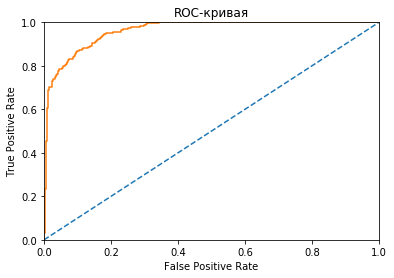

RandomForestClassifier f1_test: 0.6684782608695653
    auc_roc        f1
0  0.961117  0.668478


In [45]:
df, best = f1_model_random('RandomForestClassifier')

In [47]:
best

{'verbose': 0,
 'random_state': 12345,
 'n_jobs': -1,
 'n_estimators': 1800,
 'min_samples_split': 0.01,
 'min_samples_leaf': 100,
 'max_leaf_nodes': 100,
 'max_features': 'auto',
 'max_depth': 56,
 'class_weight': 'balanced',
 'bootstrap': True}

In [31]:
def f1_model_best(model):
    f1 = 0
    grid = 0
    accuracy_column_auc = []
    accuracy_column = []
    f1_column = []
    global best
    
    if model in "RandomForestClassifier":
        ranforclas=RandomForestClassifier(**best)
        ranforclas.fit(data_features, data_target)
        predicted_test = ranforclas.predict(val_features)
        f1=f1_score(val_target, predicted_test)
        
        answer_proba = ranforclas.predict_proba(val_features)
        answer_proba_one = answer_proba[:,1]
        auc_roc= roc_auc_score(val_target, answer_proba_one)
        
        fpr, tpr, thresholds = roc_curve(val_target, answer_proba_one)
        
        plt.figure()
        plt.plot([0, 1], [0, 1], linestyle= '--')
        plt.step(fpr, tpr, where = 'post')
        plt.ylim([0.0, 1.0])
        plt.xlim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

        plt.title('ROC-кривая')
        plt.show()
        
        f1_column.append(f1)
        accuracy_column_auc.append(auc_roc)
        df_val = pd.DataFrame({"auc_roc" : accuracy_column_auc,"f1" : f1_column})
        return df_val

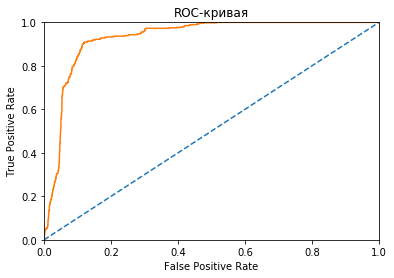

,auc_roc,f1
0,0.92935,0.66005


In [46]:
f1_model_best('RandomForestClassifier')